In [58]:
## import packages:
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
from scipy import stats #  library of statistical functions
import scipy.interpolate as interp #  library for interpolating arrays
#
# Set seed for generating psuedo random numbers
np.random.seed(12345678)
#
# Set up graphics
plt.style.use('classic')
%matplotlib inline

## The dataset I chose for this project is from Kaggle. It contains all the NBA statistics from 1950 for all the players.  It has 20 columns and 9561 rows.  The columns include the player's name, their weight, their height, their college, their country, and important game statistics.                                                                                                                                                                        Some questions I would like to answer are:

## 1. Which college has the highest point average?
## 2. Which season had the highest point total? 
## 3. What player has the highest point total? What season was it? 

# Import Dataset from CSV


In [59]:
df = pd.read_csv("all_seasons.csv", index_col=0)
df.columns #check columns to see if there are any unnamed variables

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [60]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9561.0,27.336157,4.350559,18.000000,24.000000,27.000000,30.00000,44.00000
player_height,9561.0,200.953442,9.281158,160.020000,195.580000,203.200000,208.28000,231.14000
player_weight,9561.0,100.975853,12.780883,60.327736,91.171992,100.697424,111.13004,163.29312
gp,9561.0,53.073528,24.882139,1.000000,34.000000,60.000000,75.00000,85.00000
pts,9561.0,8.070683,5.888910,0.000000,3.500000,6.600000,11.40000,35.40000
reb,9561.0,3.565161,2.494161,0.000000,1.800000,3.000000,4.70000,16.30000
ast,9561.0,1.788516,1.793835,0.000000,0.500000,1.200000,2.40000,11.70000
net_rating,9561.0,-2.214413,11.545131,-200.000000,-6.400000,-1.400000,3.10000,300.00000
oreb_pct,9561.0,0.057963,0.044568,0.000000,0.023000,0.046000,0.08800,1.00000
dreb_pct,9561.0,0.142879,0.062211,0.000000,0.097000,0.134000,0.18400,1.00000


# Using Pandas to wrangle data


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9561 entries, 0 to 9560
Data columns (total 21 columns):
player_name          9561 non-null object
team_abbreviation    9561 non-null object
age                  9561 non-null float64
player_height        9561 non-null float64
player_weight        9561 non-null float64
college              9561 non-null object
country              9561 non-null object
draft_year           9561 non-null object
draft_round          9561 non-null object
draft_number         9561 non-null object
gp                   9561 non-null int64
pts                  9561 non-null float64
reb                  9561 non-null float64
ast                  9561 non-null float64
net_rating           9561 non-null float64
oreb_pct             9561 non-null float64
dreb_pct             9561 non-null float64
usg_pct              9561 non-null float64
ts_pct               9561 non-null float64
ast_pct              9561 non-null float64
season               9561 non-null object


#  Print Index and column and remove unecessary columns 

In [62]:
print(df.index) #print the number of indexes in the dataframe
print(df.columns) #print each column in the dataframe
nba=df.drop(['gp', 'team_abbreviation', 'draft_year','draft_round', 'draft_number'],axis=1)
nba


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9551, 9552, 9553, 9554, 9555, 9556, 9557, 9558, 9559, 9560],
           dtype='int64', length=9561)
Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


,player_name,age,player_height,player_weight,college,country,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Chris Robinson,23.0,195.58,90.718400,Western Kentucky,USA,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,Matt Fish,27.0,210.82,106.594120,North Carolina-Wilmington,USA,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,30.0,208.28,106.594120,Iowa,USA,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,29.0,210.82,111.130040,Providence,USA,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,22.0,205.74,106.594120,None,USA,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
5,Martin Lewis,22.0,198.12,102.058200,Seward County Community College,USA,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
6,Mark West,36.0,208.28,111.583632,Old Dominion,USA,3.2,2.7,0.3,3.5,0.092,0.146,0.137,0.555,0.034,1996-97
7,Mark Strickland,26.0,208.28,99.790240,Temple,USA,2.0,1.2,0.0,-17.1,0.109,0.152,0.232,0.448,0.013,1996-97
8,Mark Price,33.0,182.88,81.646560,Georgia Tech,USA,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97
9,Mark Jackson,32.0,190.50,83.914520,St. John's (NY),USA,9.9,4.8,11.4,-2.0,0.035,0.116,0.155,0.525,0.464,1996-97


#  Using loc and iloc

In [63]:

print(nba.values)
nba.keys

#using loc, i was able to get the players stats for 5 and 8
nba.iloc[[5, 8]] 

[['Chris Robinson' 23.0 195.58 ... 0.486 0.156 '1996-97']
 ['Matt Fish' 27.0 210.82 ... 0.333 0.0 '1996-97']
 ['Matt Bullard' 30.0 208.28 ... 0.535 0.099 '1996-97']
 ...
 ['Edy Tavares' 25.0 220.98 ... 0.633 0.071 '2016-17']
 ['Willy Hernangomez' 23.0 210.82 ... 0.564 0.116 '2016-17']
 ['Wilson Chandler' 30.0 203.2 ... 0.545 0.097 '2016-17']]


,player_name,age,player_height,player_weight,college,country,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
5,Martin Lewis,22.0,198.12,102.05820,Seward County Community College,USA,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
8,Mark Price,33.0,182.88,81.64656,Georgia Tech,USA,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97


In [64]:
df.college #all the colleges in the dataframe

0                      Western Kentucky
1             North Carolina-Wilmington
2                                  Iowa
3                            Providence
4                                  None
5       Seward County Community College
6                          Old Dominion
7                                Temple
8                          Georgia Tech
9                       St. John's (NY)
10                     Washington State
11                           Texas Tech
12                           Seton Hall
13                                 None
14               American International
15                        Massachusetts
16                         Murray State
17                      St. John's (NY)
18                               Drexel
19                      Louisiana State
20                     Long Beach State
21                           New Mexico
22                             Michigan
23                        Massachusetts
24                         Georgia Tech


In [65]:
nba.set_index("player_name", inplace=True) 
nba.loc['Mark Price']

,age,player_height,player_weight,college,country,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
player_name,,,,,,,,,,,,,,,
Mark Price,33.0,182.88,81.64656,Georgia Tech,USA,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97
Mark Price,34.0,182.88,81.64656,Georgia Tech,USA,9.5,2.0,4.7,-3.1,0.019,0.086,0.230,0.518,0.363,1997-98


In [66]:
df[0:10] # using implicit row numbers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Chris Robinson,VAN,23.0,195.58,90.718400,Western Kentucky,USA,1996,2,51,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
5,Martin Lewis,TOR,22.0,198.12,102.058200,Seward County Community College,USA,1995,2,50,...,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
6,Mark West,CLE,36.0,208.28,111.583632,Old Dominion,USA,1983,2,30,...,3.2,2.7,0.3,3.5,0.092,0.146,0.137,0.555,0.034,1996-97
7,Mark Strickland,MIA,26.0,208.28,99.790240,Temple,USA,Undrafted,Undrafted,Undrafted,...,2.0,1.2,0.0,-17.1,0.109,0.152,0.232,0.448,0.013,1996-97
8,Mark Price,GSW,33.0,182.88,81.646560,Georgia Tech,USA,1986,2,25,...,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97
9,Mark Jackson,IND,32.0,190.50,83.914520,St. John's (NY),USA,1987,1,18,...,9.9,4.8,11.4,-2.0,0.035,0.116,0.155,0.525,0.464,1996-97


# Grouping


In [67]:
college= df.groupby('college')

college

# Which season had the highest point total? 
## using grouby and sort values, I am able to find that 2016-2017 had the most points. 

In [70]:
college= df.groupby(['season'], sort=True).sum().reset_index()
college = college.sort_values(by = ['pts'], ascending=[False])
college


,season,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
20,2016-17,13048.0,97642.68,48524.818568,26138,4095.4,1732.7,889.5,-1008.0,24.319,74.106,90.467,255.573,64.719
18,2014-15,13275.0,98809.64,49422.587288,25981,3996.3,1743.3,895.2,-1163.4,26.040,71.742,92.499,250.905,66.110
19,2015-16,12877.0,95651.32,47797.257000,26078,3974.3,1723.4,869.3,-1162.0,23.653,72.324,89.075,249.704,62.479
17,2013-14,12996.0,96768.92,48467.665976,25618,3899.5,1698.5,858.2,-918.4,26.000,70.849,88.690,246.078,61.746
15,2011-12,12949.0,95994.22,48306.187224,20758,3790.0,1702.9,834.7,-960.6,26.611,68.958,88.550,239.105,61.188
13,2009-10,11969.0,88783.16,44713.284992,24811,3788.7,1616.7,797.8,-724.5,25.067,64.195,81.985,230.954,54.677
12,2008-09,11990.0,89532.46,45120.157016,24629,3784.2,1610.9,788.5,-915.5,26.648,64.837,83.860,231.783,54.426
10,2006-07,12301.0,91922.60,46408.811888,25086,3759.6,1604.4,808.9,-1211.4,26.929,66.251,85.539,233.971,58.321
8,2004-05,12666.0,93378.02,47187.629352,24953,3752.9,1660.1,823.2,-1199.6,28.305,65.265,86.630,232.979,60.671
16,2012-13,12694.0,94157.80,47315.542296,25757,3732.3,1652.0,848.2,-1235.0,25.874,67.274,88.439,236.503,62.222


#  What player has the highest point total? What season was it? 
## using the sort values function, we can find that Kobe Bryant has the highest point total at 35 in 2016-2017

In [75]:
df.sort_values(by='pts', ascending=False)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
4119,Kobe Bryant,LAL,27.0,198.12,99.790240,None,USA,1996,1,13,...,35.4,5.3,4.5,4.7,0.026,0.127,0.384,0.559,0.228,2005-06
4321,Allen Iverson,PHI,31.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,33.0,3.2,7.4,0.8,0.016,0.071,0.354,0.543,0.331,2005-06
2778,Tracy McGrady,ORL,24.0,203.20,95.254320,None,USA,1997,1,9,...,32.1,6.5,5.5,3.5,0.046,0.147,0.350,0.564,0.282,2002-03
7702,Kevin Durant,OKC,25.0,205.74,108.862080,Texas,USA,2007,1,2,...,32.0,7.4,5.5,8.0,0.022,0.184,0.327,0.635,0.259,2013-14
9294,Russell Westbrook,OKC,28.0,190.50,90.718400,UCLA,USA,2008,1,4,...,31.6,10.7,10.4,3.3,0.053,0.279,0.408,0.554,0.543,2016-17
4495,Kobe Bryant,LAL,28.0,198.12,99.790240,None,USA,1996,1,13,...,31.6,5.7,5.4,0.6,0.028,0.132,0.333,0.580,0.249,2006-07
4106,LeBron James,CLE,21.0,203.20,108.862080,None,USA,2003,1,1,...,31.4,7.0,6.6,4.2,0.026,0.171,0.336,0.568,0.315,2005-06
2417,Allen Iverson,PHI,27.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,31.4,4.5,5.5,5.1,0.019,0.093,0.371,0.489,0.266,2001-02
1872,Allen Iverson,PHI,26.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,31.1,3.8,4.6,5.7,0.019,0.081,0.354,0.518,0.226,2000-01
3873,Allen Iverson,PHI,30.0,182.88,74.842680,Georgetown,USA,1996,1,1,...,30.7,4.0,7.9,0.3,0.018,0.089,0.347,0.532,0.361,2004-05


# Grouping By Georgia Tech
## using the the group by function, I am able to get only players from Georgia Tech. I will later use group to make my graphs. 


In [76]:

GT=df.groupby('college').get_group('Georgia Tech')
GT


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
8,Mark Price,GSW,33.0,182.88,81.646560,Georgia Tech,USA,1986,2,25,...,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97
24,Matt Geiger,CHH,27.0,215.90,111.130040,Georgia Tech,USA,1992,2,42,...,8.9,5.3,0.8,0.9,0.120,0.179,0.215,0.538,0.065,1996-97
60,Jon Barry,ATL,27.0,195.58,92.986360,Georgia Tech,USA,1992,1,21,...,4.9,1.7,2.0,5.0,0.031,0.087,0.152,0.535,0.193,1996-97
82,Kenny Anderson,POR,26.0,185.42,76.203456,Georgia Tech,USA,1991,1,2,...,17.5,4.4,7.1,4.8,0.036,0.102,0.222,0.540,0.310,1996-97
131,Stephon Marbury,MIN,20.0,187.96,81.646560,Georgia Tech,USA,1996,1,4,...,15.8,2.7,7.8,-3.1,0.028,0.066,0.244,0.519,0.373,1996-97
134,Tom Hammonds,DEN,30.0,205.74,102.058200,Georgia Tech,USA,1989,1,9,...,6.2,5.0,0.8,-7.3,0.090,0.172,0.142,0.534,0.058,1996-97
157,Travis Best,IND,24.0,180.34,82.553744,Georgia Tech,USA,1995,1,23,...,9.9,2.2,4.2,2.5,0.021,0.074,0.193,0.533,0.265,1996-97
374,Ivano Newbill,ATL,26.0,208.28,111.130040,Georgia Tech,USA,1994,Undrafted,Undrafted,...,1.4,2.8,0.3,2.5,0.104,0.189,0.083,0.439,0.042,1996-97
408,Dennis Scott,ORL,28.0,203.20,106.594120,Georgia Tech,USA,1990,1,4,...,12.5,3.1,2.1,1.9,0.021,0.092,0.188,0.519,0.106,1996-97
438,Duane Ferrell,IND,32.0,200.66,97.522280,Georgia Tech,USA,Undrafted,Undrafted,Undrafted,...,6.4,2.3,1.1,2.3,0.066,0.091,0.181,0.521,0.100,1996-97


# Using .unique and value counts

In [77]:
#using unique, find all the unique values that are in the country column
df["country"].unique()


array(['USA', 'Jamaica', 'Canada', 'Croatia', 'Serbia and Montenegro',
       'Ukraine', 'Lithuania', 'Nigeria', 'Congo', 'US Virgin Islands',
       'France', 'Slovenia', 'St. Vincent & Grenadines', 'Germany',
       'Dominican Republic', 'New Zealand', 'Georgia', 'England',
       'Belize', 'Mexico', 'Finland', 'Turkey', 'Greece', 'Puerto Rico',
       'Argentina', 'Mali', 'U.S. Virgin Islands', 'China', 'Senegal',
       'Russia', 'Yugoslavia', 'Spain', 'Venezuela', 'Haiti', 'Serbia',
       'Czech Republic', 'Brazil', 'Ireland', 'Scotland', 'Poland',
       'Netherlands', 'Montenegro', 'United Kingdom', 'South Korea',
       'Latvia', 'Democratic Republic of the Congo', 'Sudan (UK)',
       'Uruguay', 'USSR', 'Australia', 'Switzerland', 'Italy', 'Gabon',
       'Cameroon', 'Iran', 'Tanzania', 'Israel', 'Sweden', 'Panama',
       'Great Britain', 'Bosnia', 'Macedonia', 'Bosnia & Herzegovina',
       'Tunisia', 'Cabo Verde', 'South Sudan', 'Bahamas', 'Ghana',
       'Austria'], dtype


## Using the function value counts, we can find that majority of the players come from the USA

In [78]:

df["country"].value_counts()

USA                                 8173
France                               124
Canada                                96
Brazil                                66
Spain                                 61
Slovenia                              61
Argentina                             58
Turkey                                50
Lithuania                             48
Australia                             44
Croatia                               43
Serbia                                38
Russia                                36
Ukraine                               33
Serbia and Montenegro                 33
Senegal                               32
Italy                                 30
Germany                               27
Nigeria                               27
Georgia                               26
Puerto Rico                           26
Dominican Republic                    25
Montenegro                            25
Democratic Republic of the Congo      23
China           

# Which College has the highest point average

In [79]:
avgptsbycollege= nba.groupby("college",as_index=False) ["pts"].median()
avgptsbycollege.sort_values(by='pts', ascending=False)

,college,pts
274,Western Carolina,19.10
54,Davidson,18.60
247,Trinity Valley Community College,17.80
28,Butler Community College,15.95
149,Navy,15.80
120,Marist,15.80
209,Santa Clara,14.70
196,Rhode Island,14.60
109,Lehigh,13.80
115,Louisiana Tech,13.20


# Scatterplot for Height vs Points for Georgia Tech

Text(0.5, 1.0, 'Height vs Points for Georgia Tech')

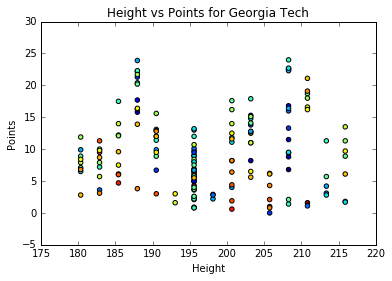

In [80]:
plt.scatter(GT.player_height, GT.pts
, c=GT.age)
plt.xlabel('Height') 
plt.ylabel('Points') 
plt.title('Height vs Points for Georgia Tech') 

# Histogram for player's age

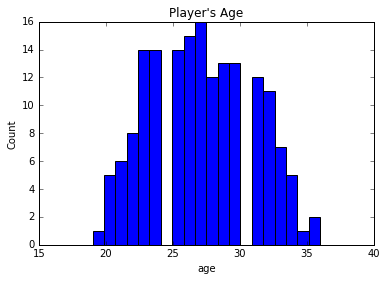

In [82]:

plt.hist(GT["age"],bins=20)
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Player's Age")
plt.show()

# Sampling
## Using the sample function, we are able to get a random sample of 10 percent of the data


In [98]:

sample = nba.sample(frac = .10, replace = True)
sample

,age,player_height,player_weight,college,country,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
player_name,,,,,,,,,,,,,,,
Damien Wilkins,30.0,198.12,102.058200,Georgia,USA,5.6,3.1,1.7,-8.7,0.050,0.127,0.141,0.515,0.126,2009-10
Marcin Gortat,24.0,213.36,108.862080,None,Poland,3.0,2.7,0.3,-0.3,0.200,0.250,0.223,0.491,0.080,2007-08
Terrell Brandon,32.0,180.34,78.471416,Oregon,USA,12.4,2.9,8.3,7.2,0.020,0.085,0.201,0.494,0.387,2001-02
Nene,27.0,210.82,113.398000,None,Brazil,13.8,7.6,2.5,5.1,0.070,0.193,0.166,0.631,0.114,2009-10
Jodie Meeks,28.0,193.04,95.254320,Kentucky,USA,7.3,1.7,1.0,12.4,0.026,0.103,0.243,0.506,0.143,2015-16
Kyle Weaver,25.0,198.12,91.171992,Washington State,USA,5.6,2.0,1.4,2.8,0.029,0.140,0.232,0.491,0.212,2010-11
JJ Redick,32.0,193.04,86.182480,Duke,USA,16.3,1.9,1.4,12.1,0.005,0.065,0.224,0.632,0.080,2015-16
Aaron Gordon,20.0,205.74,99.790240,Arizona,USA,9.2,6.5,1.6,-1.3,0.089,0.210,0.171,0.541,0.103,2015-16
Rasheed Wallace,29.0,210.82,104.326160,North Carolina,USA,16.0,6.8,2.3,3.9,0.051,0.173,0.234,0.510,0.115,2003-04


In [99]:
len(sample) #the 10 percent sample has only 956 rows 

956

In [100]:
sample1= []

sample1= sample
nopts= []
yespts = []


for i in range(0,955):
    
    nopts = sample[sample["pts"] == 0]
    yespts = sample[sample["pts"] != 0]

In [101]:
len(nopts)
nopts

,age,player_height,player_weight,college,country,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
player_name,,,,,,,,,,,,,,,
Linton Johnson,25.0,203.20,102.058200,Tulane,USA,0.0,1.5,0.0,22.8,0.000,0.214,0.084,0.0,0.000,2004-05
Elias Harris,24.0,203.20,108.408488,Gonzaga,Germany,0.0,0.5,0.5,-14.3,0.083,0.000,0.036,0.0,0.091,2013-14
Justin Dentmon,27.0,180.34,83.914520,Washington,USA,0.0,0.0,0.0,-28.6,0.000,0.000,0.222,0.0,0.000,2012-13
Darius Johnson-Odom,24.0,187.96,97.522280,Marquette,USA,0.0,0.7,0.3,-9.9,0.000,0.133,0.271,0.0,0.100,2013-14
Jelani McCoy,26.0,208.28,111.130040,UCLA,USA,0.0,2.0,0.0,-38.3,0.111,0.250,0.030,0.0,0.000,2003-04
Martynas Andriuskevicius,20.0,218.44,108.862080,None,Lithuania,0.0,0.7,0.0,37.1,0.125,0.375,0.042,0.0,0.000,2005-06
Lari Ketner,24.0,205.74,125.644984,Massachusetts,USA,0.0,0.0,0.3,-19.7,0.000,0.000,0.155,0.0,0.200,2000-01
Jason Miskiri,24.0,187.96,83.914520,George Mason,USA,0.0,0.0,1.0,-158.3,0.000,0.000,0.125,0.0,0.500,1999-00
Litterial Green,29.0,185.42,83.914520,Georgia,USA,0.0,0.0,0.0,-42.0,0.000,0.000,0.333,0.0,0.000,1998-99


# Getting Median and Mean for quantitative variable of the sample
 ## using the sample I made earlier, I was able to get the median points for each country, as well as median for each season. I also sorted by greatest to smallest

In [102]:

mean=sample.groupby("season",as_index=False) ["pts"].mean()
mean.sort_values(by='pts', ascending=False)


,season,pts
20,2016-17,9.515556
3,1999-00,9.507317
19,2015-16,9.430000
17,2013-14,9.422917
13,2009-10,9.305085
12,2008-09,8.758140
14,2010-11,8.750000
4,2000-01,8.727027
9,2005-06,8.712821
18,2014-15,8.552381


In [103]:

median= sample.groupby("country",as_index=False) ["pts"].median()
median.sort_values(by='pts', ascending=False)


,country,pts
36,US Virgin Islands,20.80
17,Italy,18.10
31,Serbia and Montenegro,16.35
6,China,13.95
35,U.S. Virgin Islands,13.30
0,Argentina,13.20
10,Dominican Republic,12.40
19,Latvia,11.90
23,Montenegro,11.85
39,United Kingdom,11.70


# Getting NP mean and median

In [104]:
import numpy as np
np.mean(nba['pts'])

8.070682982951594

In [106]:
np.median(nba['pts'])

6.6

# Using Seaborn and Matlibplot to make graphs

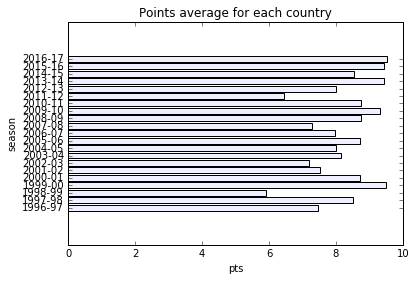

In [107]:

ypos=np.arange(len(mean["season"]))
plt.barh(ypos,mean["pts"],color='#eeefff')
plt.yticks(ypos,mean["season"])
plt.xlabel("pts")
plt.ylabel("season")
plt.title("Points average for each country")
plt.show()


[Text(0, 0.5, 'pts'),
 Text(0.5, 0, 'country'),
 Text(0.5, 1.0, 'pts by country')]

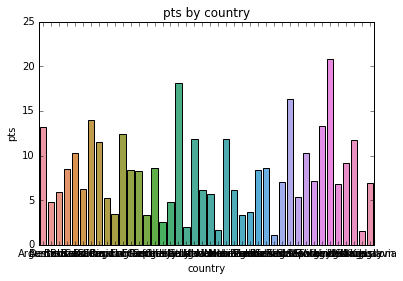

In [108]:



boxplot = sns.barplot(median["country"],median["pts"])

boxplot.set(xlabel="country",ylabel="pts",title="pts by country")